In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import func_plot as fp
import scipy.stats as ss
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression

In [3]:
mmp_fsLR = np.loadtxt('../../src/fs_LR.64k.mmp_360.txt')
ratio = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [4]:
gradient = [np.loadtxt('../../results/grad/group_grad_sparsity_'+str(ratio[i])+'_fsLR_mmp.txt') for i in range(10)]
lambdas = [np.loadtxt('../../results/grad/group_grad_sparsity_'+str(ratio[i])+'_lambdas_fsLR_mmp.txt') for i in range(10)]
max_mode = 100

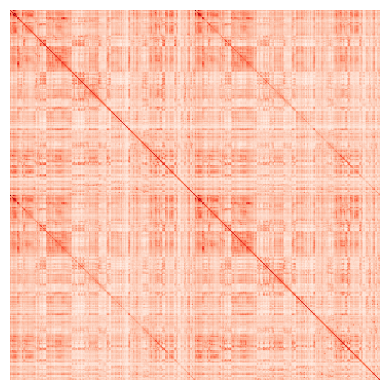

In [5]:
fc = np.loadtxt('../../results/func/fc_mean_fsLR_mmp.txt')
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(fc, cmap='Reds')
ax.set_axis_off()
fig.tight_layout()
fig.savefig('../../figures/fc_mean_fsLR_mmp.png', transparent=True, dpi=300)

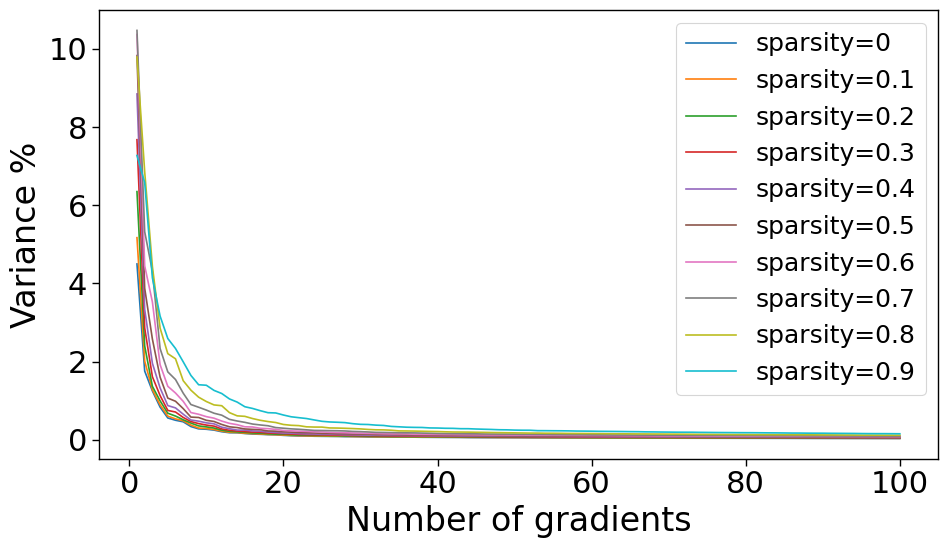

In [6]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(10,6))
for i in range(10):
  plt.plot(range(1,101),lambdas[i]*100, label='sparsity='+str(ratio[i]))
plt.legend(fontsize=18)
ax.set_xlabel('Number of gradients')
ax.set_ylabel('Variance %')
fig.tight_layout()
fig.savefig('../../figures/lambdas_fsLR_mmp.png', transparent=True, dpi=300)

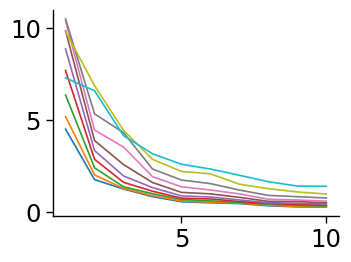

In [7]:
sns.set_context("paper", font_scale = 2)
fig, ax = plt.subplots(figsize=(4,3))
for i in range(10):
  ax.plot(range(1,11),lambdas[i][:10]*100, label='sparsity='+str(ratio[i]))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/lambdas10_fsLR_mmp.png', transparent=True, dpi=300)
  

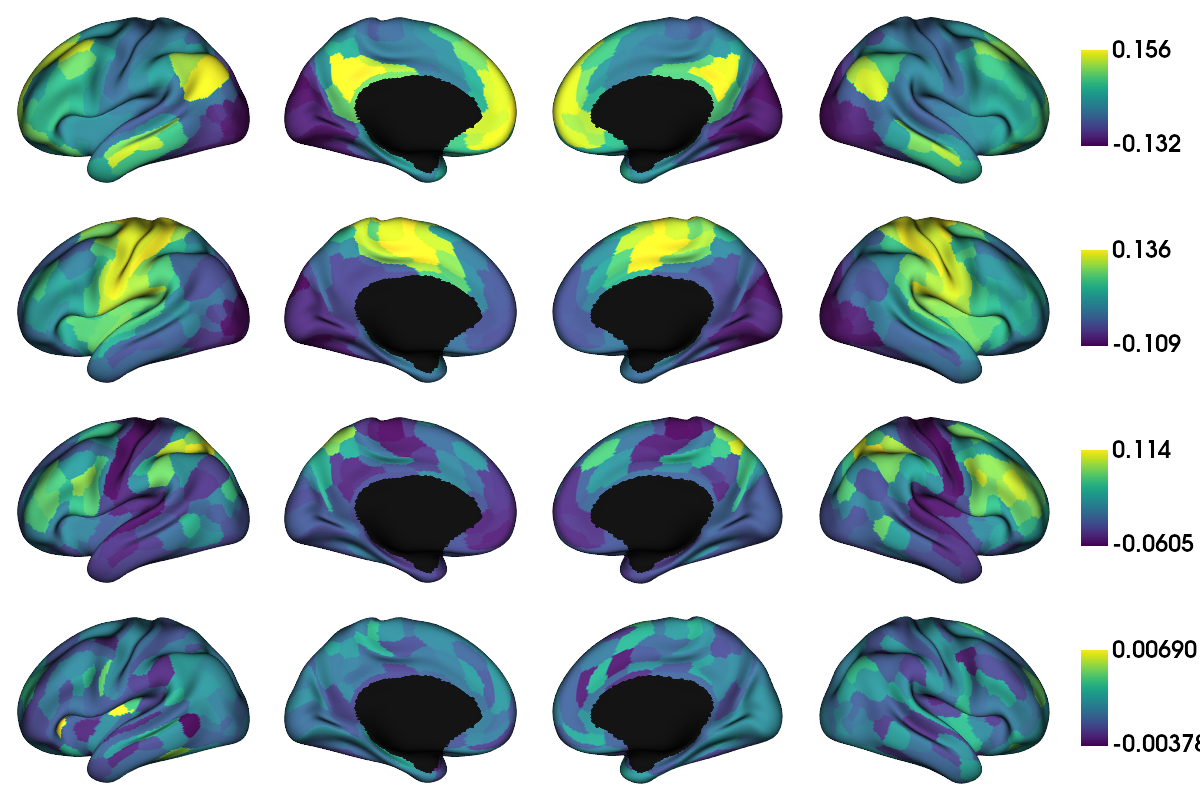

In [8]:
plot = [None] * 4
spa = [0,1,2,99]
for i in range(4):
  plot[i] = mmp_fsLR.copy()
  for node in range(360):
    plot[i][mmp_fsLR==node+1] = gradient[9][:,spa[i]][node]
  plot[i][mmp_fsLR==0] = np.nan

fp.plot_surface(data = plot, surf='fsLR',
                size = (1200, 800), 
                cmap = 'viridis', filename = '../../figures/grad_fsLR_mmp_sparsity_'+str(ratio[9])+'.png',
                display=True)

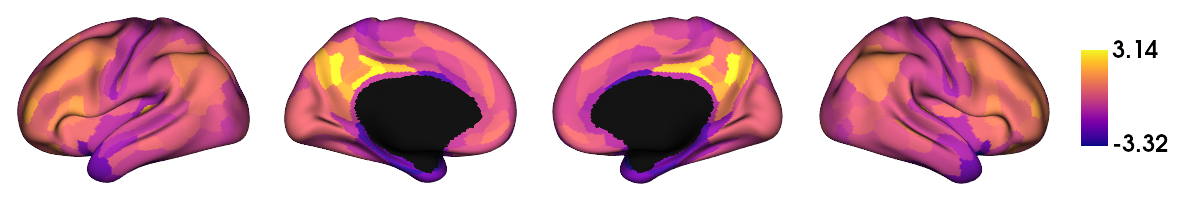

In [9]:
glucose_raw = np.loadtxt('../../results/glucose/mean_mmp.txt')
glucose_l = ss.zscore(glucose_raw[:180])
glucose_r = ss.zscore(glucose_raw[180:])
glucose = np.concatenate((glucose_l, glucose_r))
glucose_asy = glucose_l - glucose_r
plot = mmp_fsLR.copy()
for node in range(360):
  plot[mmp_fsLR==node+1] = glucose[node]
plot[mmp_fsLR==0] = np.nan
    
fp.plot_surface(data = plot, surf='fsLR',
                size = (1200, 200), 
                cmap = 'plasma', filename = '../../figures/CMRglc_mean_fsLR_mmp.png',
                display=True)

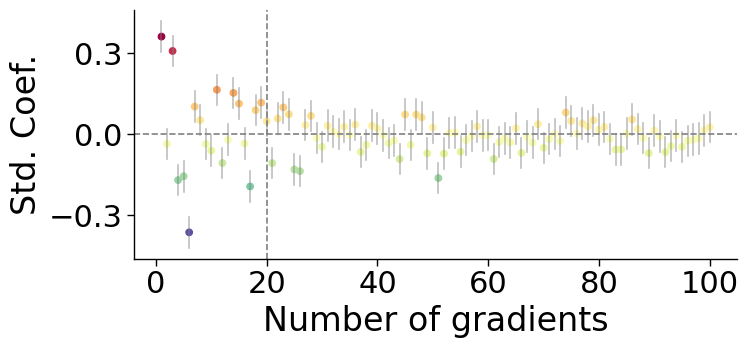

In [216]:
corr = np.zeros((10,max_mode))
for i in range(10):
  for j in range(max_mode):
    glm = OLS(glucose, np.concatenate((np.ones((360,1)), gradient[i][:,:j+1]),axis=1)).fit()
    corr[i,j]=glm.rsquared_adj

std = np.concatenate((np.ones((360,1)), gradient[i][:,:j+1]),axis=1).std(0)
std[0] = 1
tt = glm.t_test(np.diag(std))

sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,4))
for i in range(100):
    ax.plot([i+1,i+1],[tt.summary_frame()['Conf. Int. Low'][i+1],tt.summary_frame()['Conf. Int. Upp.'][i+1]], color='gray',alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axhline(y=0,c='gray',ls='--')
ax.axvline(x=10,c='gray',ls='--')
ax.scatter(range(1,101), list(tt.summary_frame().coef[1:]),cmap='Spectral_r',c=list(tt.summary_frame().coef[1:]))
ax.set_yticks([-0.3,0,0.3])
ax.set_ylabel('Std. Coef.')
ax.set_xlabel('Number of gradients')
fig.tight_layout()
fig.savefig('../../figures/fitting_beta_fsLR_mmp.png', transparent=True, dpi=300)

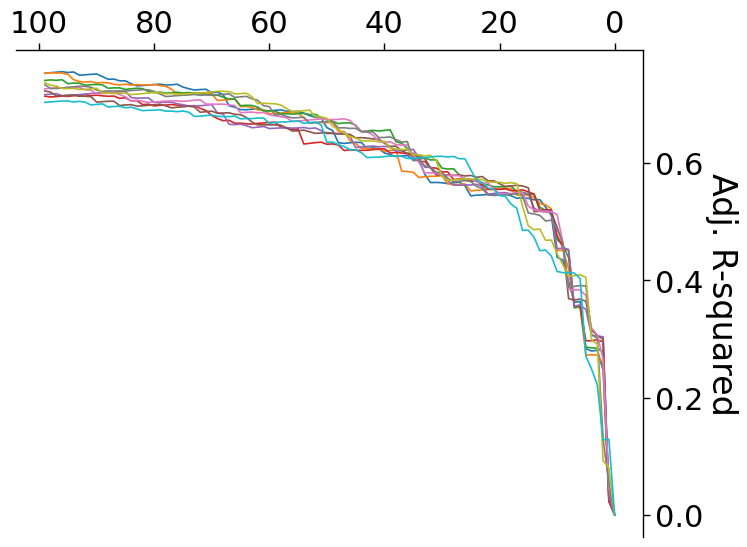

In [83]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
  ax.plot(range(1,max_mode+1), corr[i][::-1], label='sparsity=' + str(ratio[i]))
#ax.set_xlabel('Steps')
ax.set_ylabel('Adj. R-squared', rotation=270, labelpad=25)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticks([0,20,40,60,80,100])
ax.set_xticklabels(['100','80','60','40','20','0'])
ax.xaxis.tick_top()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/fitting_fsLR_mmp.png', transparent=True, dpi=300)

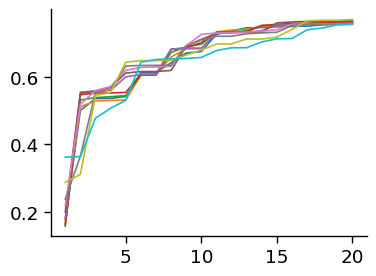

In [12]:
sns.set_context("paper", font_scale = 1.5)
fig, ax = plt.subplots(figsize=(4,3))
for i in range(10):
  ax.plot(range(1,21), corr[i][:20])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/fitting20_fsLR_mmp.png', transparent=True, dpi=300)

# ASYMMETRY

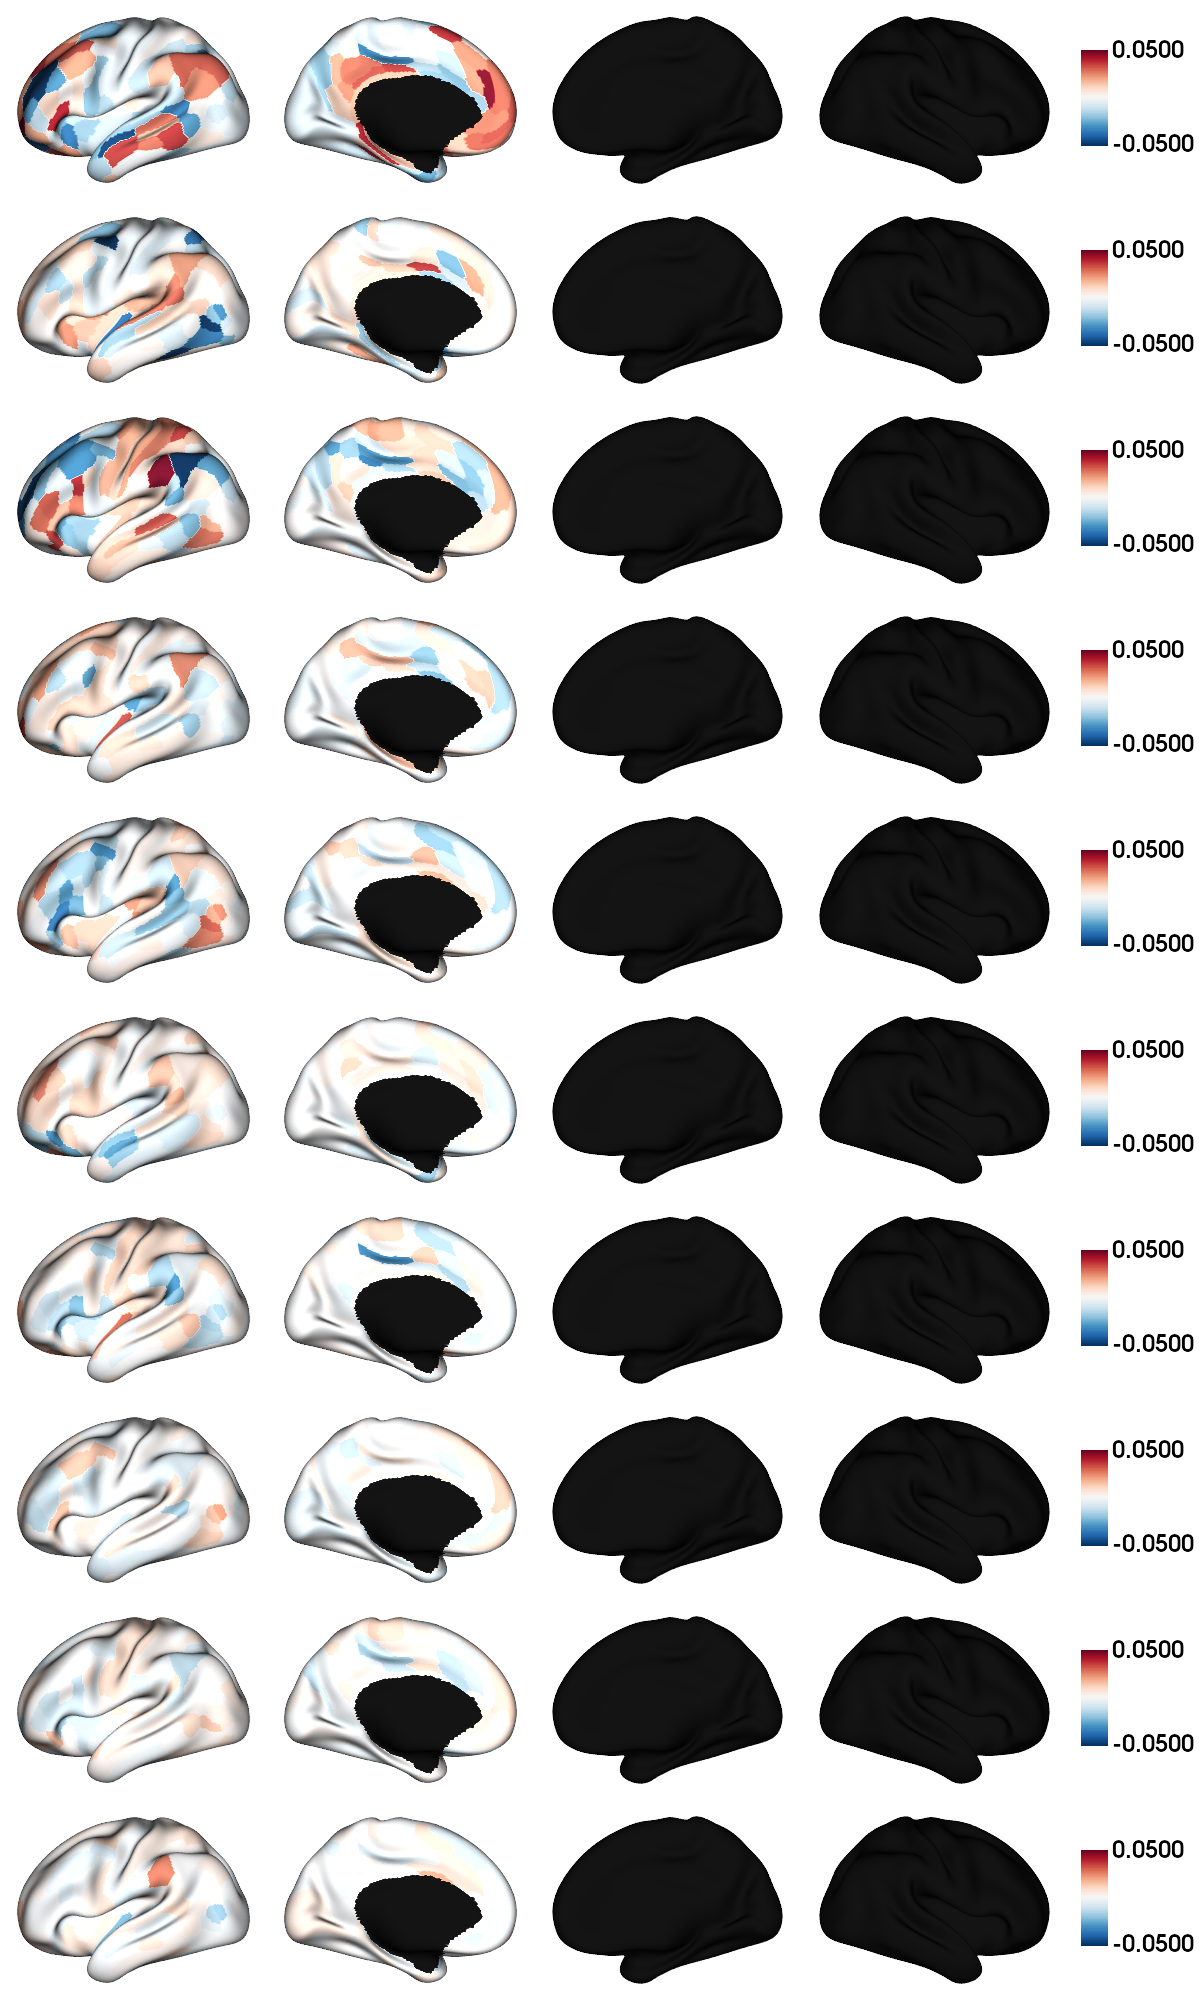

In [13]:
lhlh = [np.loadtxt('../../results/grad/group_grad_sparsity_'+str(ratio[i])+'_fsLR_mmp_lh.txt') for i in range(10)]
rhrh = [np.loadtxt('../../results/grad/group_grad_sparsity_'+str(ratio[i])+'_fsLR_mmp_rh_aligned.txt') for i in range(10)]
grad_asy = np.array(lhlh) - np.array(rhrh) 
grad_asy_plot = np.concatenate((grad_asy, np.zeros((10,180,100))),axis=1)
plot = [None] * 10
for i in range(10):
  plot[i] = mmp_fsLR.copy()
  for node in range(360):
    plot[i][mmp_fsLR==node+1] = grad_asy_plot[9][:,i][node]
  plot[i][plot[i]==0] = np.nan

fp.plot_surface(data = plot, surf='fsLR', color_range=(-0.05,0.05),
                size = (1200, 2000), 
                cmap = 'RdBu_r', filename = '../../figures/asy_grad_fsLR_mmp_sparsity_'+str(ratio[9])+'.png',
                display=True)

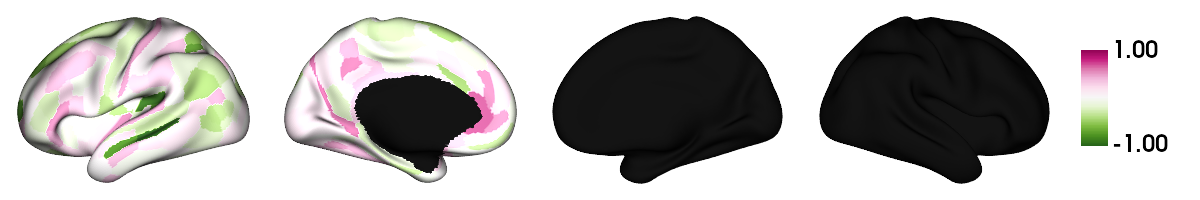

In [14]:
glucose_asy_plot = np.concatenate((glucose_asy, np.zeros(180)))
plot = mmp_fsLR.copy()
for node in range(360):
  plot[mmp_fsLR==node+1] = glucose_asy_plot[node]
plot[plot==0] = np.nan
    
fp.plot_surface(data = plot, surf='fsLR', color_range=(-1,1),
                size = (1200, 200), 
                cmap = 'PiYG_r', filename = '../../figures/asy_CMRglc_mean_fsLR_mmp.png',
                display=True)

## Left for right

In [15]:
r_ll = np.zeros((10,max_mode))
r_lr = np.zeros((10,max_mode))
for i in range(10):
  for j in range(max_mode):
    glm = LinearRegression()
    glm.fit(lhlh[i][:,:j+1], glucose[:180])
    tmp = glm.predict(lhlh[i][:180,:j+1])
    r_ll[i,j]=np.corrcoef(glucose[:180], tmp)[0,1]
    tmp = glm.predict(rhrh[i][:,:j+1])
    r_lr[i,j]=np.corrcoef(glucose[180:], tmp)[0,1]

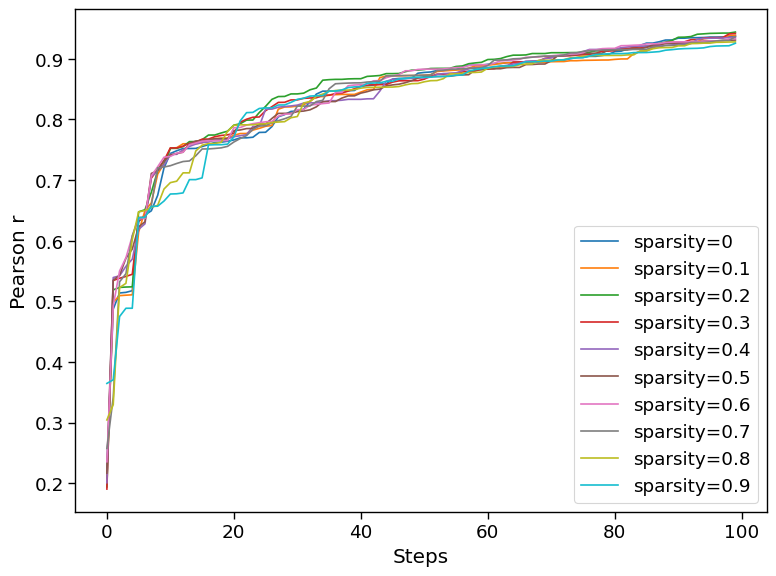

In [16]:
sns.set_context("paper", font_scale = 1.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
  ax.plot(np.arange(max_mode), r_ll[i], label='sparsity=' + str(ratio[i]))
plt.legend()
ax.set_xlabel('Steps')
ax.set_ylabel('Pearson r')
fig.tight_layout()
fig.savefig('../../figures/fitting_in_LH_fsLR_mmp.png', transparent=True, dpi=300)

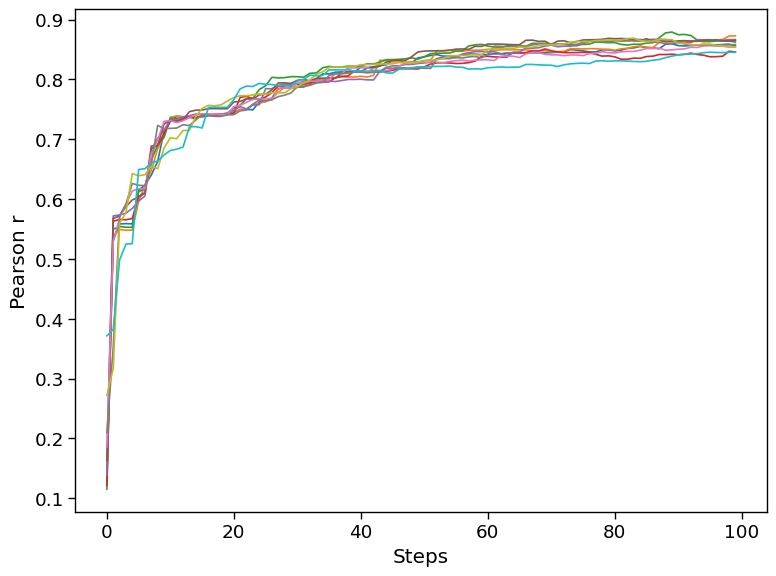

In [17]:
sns.set_context("paper", font_scale = 1.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
  ax.plot(np.arange(max_mode), r_lr[i], label='sparsity=' + str(ratio[i]))
ax.set_xlabel('Steps')
ax.set_ylabel('Pearson r')
fig.tight_layout()
fig.savefig('../../figures/fitting_in_RH_refLH_fsLR_mmp.png', transparent=True, dpi=300)

## right for left

In [18]:
r_rl = np.zeros((10,max_mode))
r_rr = np.zeros((10,max_mode))
for i in range(10):
  for j in range(max_mode):
    glm = LinearRegression()
    glm.fit(rhrh[i][:,:j+1], glucose[180:])
    tmp = glm.predict(rhrh[i][:,:j+1])
    r_rr[i,j]=np.corrcoef(glucose[180:], tmp)[0,1]
    tmp = glm.predict(lhlh[i][:,:j+1])
    r_rl[i,j]=np.corrcoef(glucose[:180], tmp)[0,1]

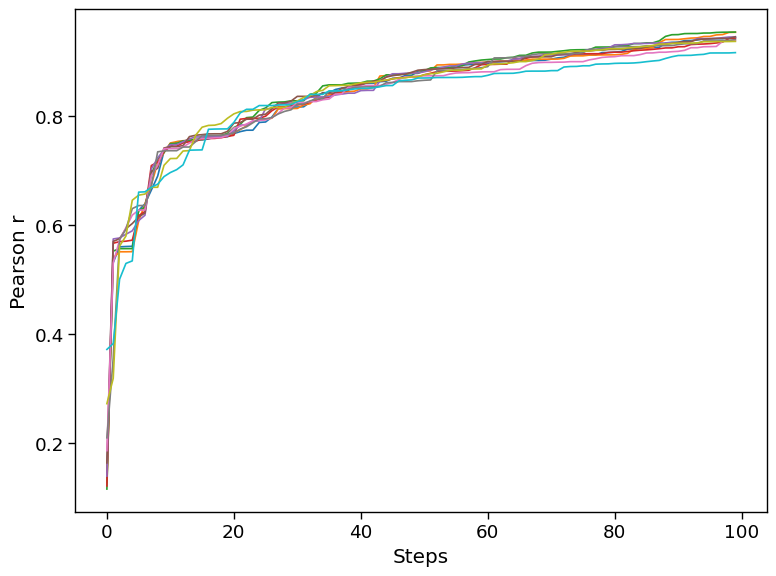

In [19]:
sns.set_context("paper", font_scale = 1.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
  ax.plot(np.arange(max_mode), r_rr[i], label='sparsity=' + str(ratio[i]))
ax.set_xlabel('Steps')
ax.set_ylabel('Pearson r')
fig.tight_layout()
fig.savefig('../../figures/fitting_in_RH_fsLR_mmp.png', transparent=True, dpi=300)

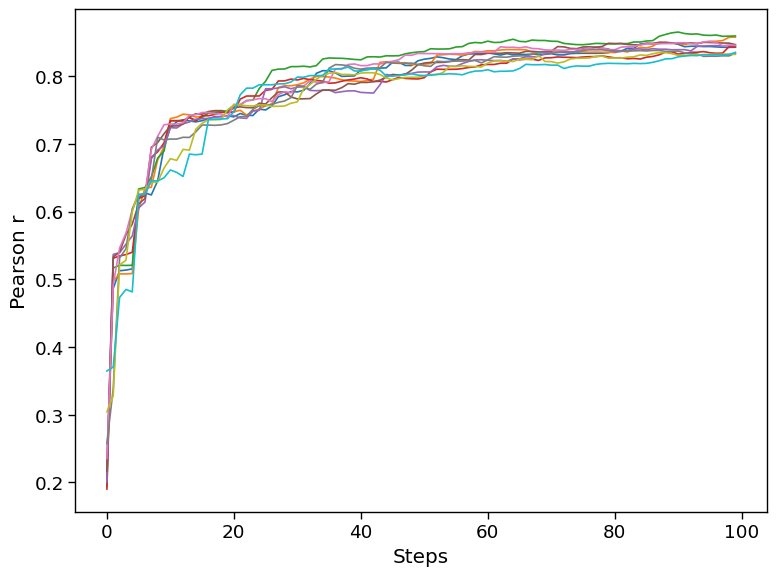

In [20]:
sns.set_context("paper", font_scale = 1.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
  ax.plot(np.arange(max_mode), r_rl[i], label='sparsity=' + str(ratio[i]))
ax.set_xlabel('Steps')
ax.set_ylabel('Pearson r')
fig.tight_layout()
fig.savefig('../../figures/fitting_in_LH_refRH_fsLR_mmp.png', transparent=True, dpi=300)

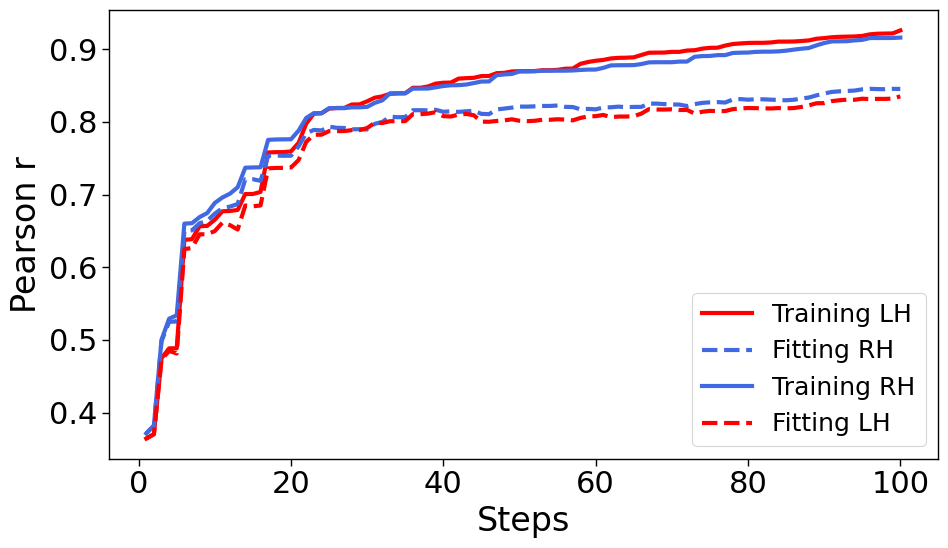

In [21]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(10,6))
i=9
ax.plot(range(1,max_mode+1), r_ll[i], label='Training LH', c='red', lw=3)
ax.plot(range(1,max_mode+1), r_lr[i], label='Fitting RH', c='royalblue', ls='--', lw=3)
ax.plot(range(1,max_mode+1), r_rr[i], label='Training RH', c='royalblue', lw=3)
ax.plot(range(1,max_mode+1), r_rl[i], label='Fitting LH', c='red', ls='--', lw=3)
ax.set_xlabel('Steps')
ax.set_ylabel('Pearson r')
plt.legend(fontsize=18)
fig.tight_layout()
fig.savefig('../../figures/fitting_sparsity_0.9_fsLR_mmp.png', transparent=True, dpi=300)

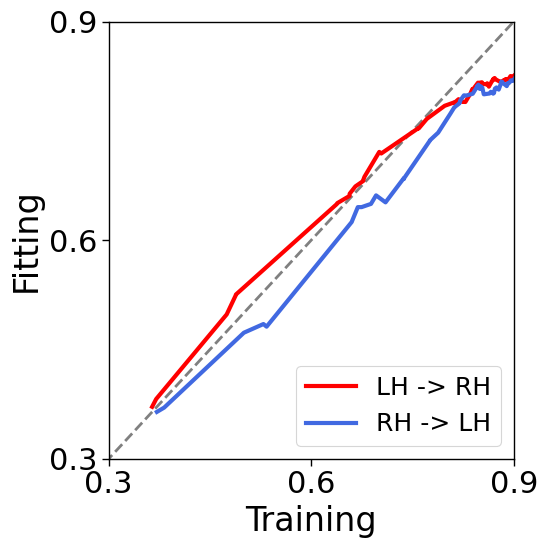

In [22]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(6,6))
i=9
ax.plot([0,1], [0,1], c='gray', ls='--', lw=2)
ax.plot(r_ll[i], r_lr[i], c='red', label='LH -> RH', lw=3)
ax.plot(r_rr[i], r_rl[i], c='royalblue', label='RH -> LH', lw=3)
ax.set_xlabel('Training')
ax.set_ylabel('Fitting')
ax.set_xlim(0.3,0.9)
ax.set_ylim(0.3,0.9)
ax.set_xticks([0.3, 0.6, 0.9])
ax.set_yticks([0.3, 0.6, 0.9])
plt.legend(loc = 'lower right', fontsize=18)
fig.tight_layout()
fig.savefig('../../figures/fitting_diag_sparsity_0.9_fsLR_mmp.png', transparent=True, dpi=300)

In [23]:
r_asy = np.zeros((10,max_mode))
for i in range(10):
  for j in range(max_mode):
    glm = LinearRegression()
    glm.fit(grad_asy[i][:,:j+1], glucose_asy)
    tmp = glm.predict(grad_asy[i][:,:j+1])
    r_asy[i,j]=np.corrcoef(glucose_asy, tmp)[0,1]

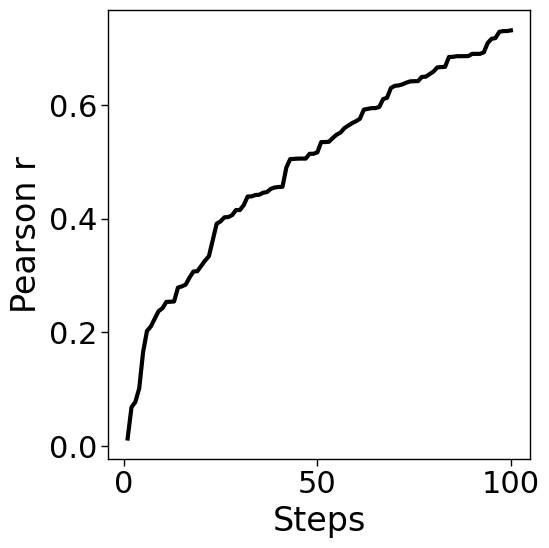

In [24]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(6,6))
i=9
ax.plot(range(1,max_mode+1), r_asy[i], c='black', lw=3)
ax.set_xlabel('Steps')
ax.set_ylabel('Pearson r')
#plt.legend(fontsize=18)
fig.tight_layout()
fig.savefig('../../figures/fitting_asy_sparsity_0.9_fsLR_mmp.png', transparent=True, dpi=300)